<a href="https://colab.research.google.com/github/raklives/DS-Unit-1-Sprint-2-Statistics/blob/master/Samuel_R_Conteh_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# import libraries
import pandas as pd

In [18]:
# get the data 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2020-02-08 02:23:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.2’

crx.data.2          100%[===================>]  31.46K  --.-KB/s    in 0.06s   

2020-02-08 02:23:43 (485 KB/s) - ‘crx.data.2’ saved [32218/32218]



In [191]:
# read into a data frame
credit = pd.read_csv('crx.data.1')

# check 
credit.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [192]:
# check shape
credit.shape

# matches dataset description

(689, 16)

In [193]:
# visually checking for missing data
credit.head(10)

# nothing seems missing
# noticed some column data types don't match what they should be
# 01 ; 00202 ; 0.1 is not continuous 

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [194]:
# check for missing data using .isnull
credit.isnull().values.sum()

# returns there 67 missing values 

0

In [199]:
# re-read into a data frame
# replace missing data with NaN
credit = pd.read_csv('crx.data.1', na_values='?')

# check 
credit.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


In [196]:
# check the datatypes of each feature's values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
b        677 non-null object
30.83    677 non-null float64
0        689 non-null float64
u        683 non-null object
g        683 non-null object
w        680 non-null object
v        680 non-null object
1.25     689 non-null float64
t        689 non-null object
t.1      689 non-null object
01       689 non-null int64
f        689 non-null object
g.1      689 non-null object
00202    676 non-null float64
0.1      689 non-null int64
+        689 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.2+ KB


In [0]:
# PART 1 STRETCH GOALS
# convert all objects that are floats to floats
# All floats appear to be floats 

In [166]:
# convert 0.1 to floats
credit['0.1'] = credit['0.1'].astype(float)

# check
print('Look mama! That feature turned into a float!')
credit.head(5)


Look mama! That feature turned into a float!


,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560.0,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824.0,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3.0,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0.0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0.0,+


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

### How do the classes differ? Are the differences significant?

In [167]:
# explore the data 
credit.describe()

,30.83,0,1.25,01,00202,0.1
count,677.000000,689.000000,689.000000,689.000000,676.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,183.988166,1018.862119
std,11.966670,4.978470,3.348739,4.866180,173.934087,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,74.500000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,277.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


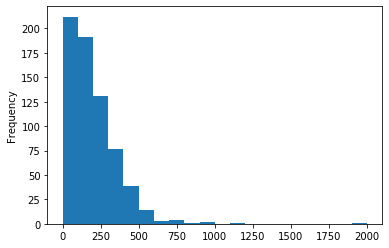

In [200]:
# exploring some feature. this is the feature 00202
# seems very skewed
credit['00202'].plot(kind='hist', bins=20);

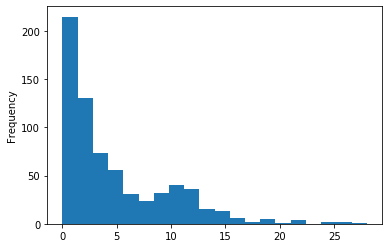

In [169]:
# explore 'o' to see how close to a normal distribution the values fall
credit['0'].plot(kind='hist', bins=20);

# also skewed to the left

In [170]:
# filter the data frame by class
# start with class of people that were accepted
class_approved = credit[credit['+']=='+']

#check
class_approved.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560.0,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824.0,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3.0,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0.0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0.0,+


In [171]:
# filter for data set for appllicants that were denied credit
class_denied = credit[credit['+']=='-']

# see
class_denied.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
69,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0.0,-
70,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0.0,-
71,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0.0,-
72,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0.0,-
73,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2.0,-


In [172]:
# the two classes seem to not be too different greatey on 1.25
# calculate the population means of those two categories
popmean_a = credit['1.25'].mean() # pop mean for 1.25
print(popmean_a)

# the two calsses seem to be very different in 0.1
popmean_b = credit['0.1'].mean() # pop mean for 01
print(popmean_b)

2.2248185776487643
1018.8621190130624


In [173]:
# describe class_approved 
class_approved.describe()

,30.83,0,1.25,01,00202,0.1
count,304.000000,306.000000,306.000000,306.000000,300.000000,306.000000
mean,33.730000,5.924248,3.435016,4.617647,164.296667,2045.522876
std,12.829683,5.469973,4.125652,6.327215,162.026347,7671.419484
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.335000,4.460000,2.000000,3.000000,120.000000,227.500000
75%,41.352500,9.530000,5.000000,7.000000,280.000000,1209.500000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [174]:
# describe class_denied data
class_denied.describe()

,30.83,0,1.25,01,00202,0.1
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [175]:
# confirm '1.25 is continuous
credit['1.25'].describe()

count    689.000000
mean       2.224819
std        3.348739
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: 1.25, dtype: float64

In [0]:
# import needed libraries
from scipy.stats import ttest_ind, ttest_1samp

In [177]:
# is the difference between the two class significant on '1.25. Yes
ttest_ind(class_approved['1.25'], class_denied['1.25'], nan_policy='omit')

Ttest_indResult(statistic=8.953578558992847, pvalue=3.188202861884123e-18)

In [178]:
# is there a significant difference between the two classes on '0.1'
ttest_ind(class_approved['0.1'], class_denied['0.1'], nan_policy='omit')

Ttest_indResult(statistic=4.69003486307862, pvalue=3.296216085672561e-06)

In [0]:
# STRETCH PART 2
#create function that can calculate ttests

In [0]:
# start by importing the needed libraries

### Categorical Data

In [179]:
# see data to choose with categorical features to run cross tabs on
credit.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560.0,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824.0,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3.0,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0.0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0.0,+


In [180]:
# description of categorical data
credit.describe(exclude='number')

,b,u,g,w,v,t,t.1,f,g.1,+
count,677,683,683,680,680,689,689,689,689,689
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,467,518,518,137,398,360,395,373,624,383


In [181]:
# are the classes evenly distributed by 't'
t_compare = pd.crosstab(credit['+'], credit['t'], dropna='True')
t_compare

t,f,t
+,,
+,23,283
-,306,77


In [182]:
# depend obs
from scipy.stats import chisquare 
chisquare(t_compare, axis=None)

# pvalue suggests that class and 't' are dependent variables

Power_divergenceResult(statistic=357.055152394775, pvalue=4.425657060483362e-77)

In [183]:
# cross tab of 'g' and 'u' feature
t_one_compare = pd.crosstab(credit['g'], credit['u'])
t_one_compare

u,l,u,y
g,,,
g,0,518,0
gg,2,0,0
p,0,0,163


In [184]:
# run chisquare test for dependecy. 
# expected results to show non dependency, but all categorical variables appear (at the complete data frame level)
# to be dependent.
# pvalues are all less than 0. 
chisquare(t_one_compare, axis=None)

Power_divergenceResult(statistic=3202.9048316251824, pvalue=0.0)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#### A1. this Ttest suggests that the difference between the two class significant on '1.25. Yes
>ttest_ind(class_approved['1.25'], class_denied['1.25'], nan_policy='omit')

>Ttest_indResult(statistic=8.953578558992847, pvalue=3.188202861884123e-18)

### A2. The results of this Ttest suggest that there is no significant difference between the two classes on this specific feature. 
>ttest_ind(class_approved['0.1'], class_denied['0.1'], nan_policy='omit')

>Ttest_indResult(statistic=4.69003486307862, pvalue=3.296216085672561e-06)


#### B. I was unable to find a combination of features to run a chisquare test that would result in a high p value; which would suggest dependency/ failure to reject the null hypothesis. 




#### C. The most challanging part of this sprint was understanding the instructions and what it wanted me to do. Seemed wordy. Another mildly difficult task was finding 

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.